# Anomaly Detection

In [1]:
import pandas as pd 
import numpy as np  
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('UberEdited.csv').head(500)

In [3]:
df.head()

,Unnamed: 0,index,Unumber,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_range
0,0,129546,4264204,2013-10-11 20:42:00.000000209,13.50,2013-10-11 20:42:00 UTC,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,4.0
1,1,157708,16914374,2009-05-22 22:56:00.000000207,28.25,2009-05-22 22:56:00 UTC,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,10000.0
2,2,146825,274789,2011-02-28 06:56:44.0000002,6.90,2011-02-28 06:56:44 UTC,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,3.0
3,3,192482,11942062,2015-01-04 17:04:31.0000004,39.33,2015-01-04 17:04:31 UTC,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,10000.0
4,4,187756,42996243,2014-04-27 12:59:00.000000182,14.50,2014-04-27 12:59:00 UTC,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,4.0


In [4]:
df = df.drop(columns=['index','Unumber','key'])
df.head()

,Unnamed: 0,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance,distance_range
0,0,13.50,2013-10-11 20:42:00 UTC,-73.968367,40.755280,-74.000925,40.731782,1,3.705146,4.0
1,1,28.25,2009-05-22 22:56:00 UTC,-73.871200,40.773960,-73.996203,40.759870,1,13.958072,10000.0
2,2,6.90,2011-02-28 06:56:44 UTC,-73.996791,40.737605,-73.977832,40.763559,1,2.261968,3.0
3,3,39.33,2015-01-04 17:04:31 UTC,-73.873100,40.774040,-73.985306,40.732552,1,12.588475,10000.0
4,4,14.50,2014-04-27 12:59:00 UTC,-73.956453,40.771052,-73.991773,40.749097,1,3.999675,4.0


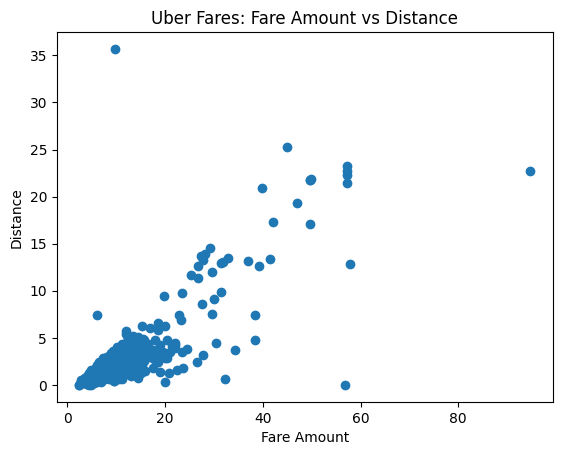

In [5]:
# Create a scatterplot of High vs Low
plt.scatter(df['fare_amount'], df['distance'])
plt.title('Uber Fares: Fare Amount vs Distance')
plt.xlabel('Fare Amount')
plt.ylabel('Distance')
plt.show()

# DBSCAN

In [6]:

# Scale the data using standardization
scaler = StandardScaler()
X = scaler.fit_transform(df[['fare_amount', 'distance']])

# Apply DBSCAN with eps=0.5 and min_samples=5
db = DBSCAN(eps=0.25, min_samples=5).fit(X)

# Identify outliers based on their cluster label (-1 indicates an outlier)
outliers = df[db.labels_ == -1]

# Print the outliers count
print(outliers.count())

Unnamed: 0           55
fare_amount          55
pickup_datetime      55
pickup_longitude     55
pickup_latitude      55
dropoff_longitude    55
dropoff_latitude     55
passenger_count      55
distance             55
distance_range       55
dtype: int64


In [7]:
print(outliers[['fare_amount','distance']])

     fare_amount   distance
1          28.25  13.958072
3          39.33  12.588475
9          31.50   9.897890
19         49.57  21.718058
26         23.50   9.802728
28         38.50   4.800868
37         57.33  23.230997
43         26.75  12.643990
57         25.30  11.699410
58         42.00  17.294575
65         15.30   6.243969
93         31.47  12.903499
97         18.50   6.581394
99         19.95   6.303777
102        29.70  11.970987
109        57.33  21.471089
113        30.50   4.419514
114        37.00  13.124976
122        27.70   3.221695
140        27.47  13.645623
149        34.27   3.726211
191        22.90   7.469273
194        20.90   1.282178
199        31.83  13.026491
209        94.75  22.743744
218        27.70  13.303341
219        57.33  22.287972
221        32.80  13.442987
225        20.00   0.352353
226        22.50   1.552451
230        49.57  17.046788
237        41.45  13.327639
238        49.80  21.852960
271        29.30  14.569391
275        27.50   8

# KNN

In [8]:
# Define the number of neighbors to consider
k = 5

# Fit the K-NN model on the High, Low, Open, Close, and Adj Close columns
X = df[['fare_amount', 'distance']]
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)

# Calculate the average distance to the k nearest neighbors for each data point
avg_distances = distances[:,1:].mean(axis=1)

# Set a threshold for outlier detection (e.g. 2 standard deviations above the mean)
threshold = avg_distances.mean() + 2 * avg_distances.std()

# Identify outliers based on the threshold
outliers = df[avg_distances > threshold]

# Print the outliers count
print(outliers.count())

Unnamed: 0           7
fare_amount          7
pickup_datetime      7
pickup_longitude     7
pickup_latitude      7
dropoff_longitude    7
dropoff_latitude     7
passenger_count      7
distance             7
distance_range       7
dtype: int64


In [9]:
print(outliers[['fare_amount','distance']])

     fare_amount   distance
28         38.50   4.800868
209        94.75  22.743744
315         9.70  35.688645
455        45.00  25.290967
465        56.80   0.001022
466        39.83  20.890264
488        57.81  12.834846
